# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

NOTAS:
    
PARA ELEGIR LA VARIABLE CON LA QUE SE HACE LA RED NEURONAL, HAY QUE VER CUALES DOS TIENEN UNA MAYOR RELACION LINEAL PARA QUE SEA CAPAZ DE PREDECIR MEJOR



# Apartado 2: Clasificación

__Número de grupo: 15__

__Nombres de los estudiantes: Javier Sande Ríos y Mario Sanz Guerrero__

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

#### Solución:

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('mobile_phones.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df_num = df.drop(columns=['price_range'])
df_num

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [4]:
df_num.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

#### Solución:

**Equilibrio de las clases a predecir:**

La clase a predecir es la clase objetivo, que en este caso es `price_range`. Es por ello que vamos a estudiar la cantidad de móviles que hay para cada rango de precios y el porcentaje del total que tiene cada uno:

In [5]:
# Número de móviles en cada rango de precios
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [6]:
# Porcentaje del total que tiene cada rango de precios
df['price_range'].value_counts() / df['price_range'].count() * 100

1    25.0
2    25.0
3    25.0
0    25.0
Name: price_range, dtype: float64

<AxesSubplot:ylabel='price_range'>

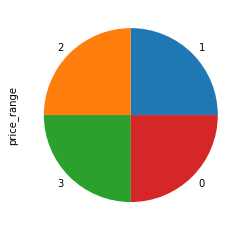

In [7]:
df['price_range'].value_counts().plot.pie()

Como vemos en los resultados, cada rango de precios tiene 500 móviles, lo que implica que, teniendo en cuenta que el total son 2000 móviles, cada rango de precios tiene exactamente el 25% de los móviles.

Gracias a esto sabemos que la clase a predecir está perfectamente equilibrada.

El hecho de que la clase a predecir esté o no equilibrada a la hora de entrenar y evaluar un modelo afecta al exceso o ausencia de aprendizaje. Es decir, que si la variable a predecir no estuviera equilibrada, tendríamos el riesgo de no poder aprender lo suficiente de una clase que tenga poca representación y sobreaprender de otra clase que tenga mucha representación. Esto podría suponer que el modelo no sepa predecir correctamente la clase a la que tiene que pertenecer un móvil. Si por ejemplo solo tuviéramos móviles muy caros en nuestro dataset y de repente nos piden que clasifiquemos un móvil barato, no vamos a saber en qué rango de precio categorizarlo (0, 1 o 2) porque no tenemos con qué compararlo ni móviles de características similares de los que haber podido aprender.

**Correlación de las variables numéricas con la variable `price_range`:**

In [8]:
correlacion = df.corrwith(df['price_range'], axis=0).sort_values(ascending=False)
correlacion

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
dtype: float64

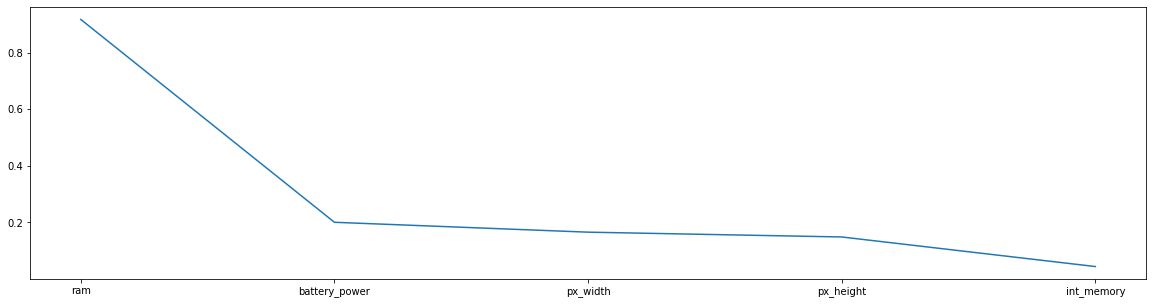

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(correlacion[1:6])
plt.show()

**Análisis:** Viendo la correlación de los datos entre las características de los móviles y su rango de precio, podemos concluir que lo que más relacionado está es la cantidad de memoria RAM (`ram`) que tiene el móvil con mucha diferencia sobre el resto de características. Las siguientes tres variables más determinantes a la hora de establecer el precio de un móvil son la potencia de la batería (`battery_power`), el ancho de los píxeles (`px_width`) y el alto de los píxeles (`px_height`). Las variables mencionadas serán las usadas en el siguiente apartado del ejercicio.

**Análisis de las 4 variables con mayor correlacion con `price_range`:**

In [10]:
variables = ['ram', 'battery_power', 'px_width', 'px_height']
variables

['ram', 'battery_power', 'px_width', 'px_height']

Comenzaremos por calcular los rangos de las 4 variables. Por definición, el rango de un conjunto de valores es la resta del mayor número menos el menor número. A estos valores podemos acceder directamente con las funciones `max()` y `min()` de los dataframe, así que lo podemos calcular fácilmente:

In [11]:
rangos = []
rangos.append(df_num['ram'].max() - df_num['ram'].min())
rangos.append(df_num['battery_power'].max() - df_num['battery_power'].min())
rangos.append(df_num['px_width'].max() - df_num['px_width'].min())
rangos.append(df_num['px_height'].max() - df_num['px_height'].min())
rangos

[3742, 1497, 1498, 1960]

<BarContainer object of 4 artists>

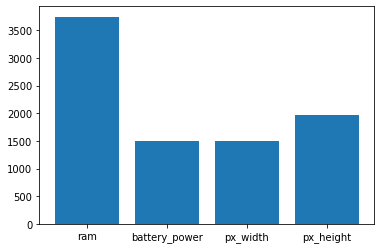

In [12]:
plt.bar(variables, rangos)

El rango **no** es un dato que nos dé información sobre cómo se relacionan las variables entre sí, ya que es un dato que solo mide la diferencia entre el máximo y el mínimo de cada variable. Aún así, vemos que el rango de la RAM está mucho más por encima que las demás, lo cual indica que hay una mayor variación numérica entre los datos de esta variable que en los datos de las demás variables.

A continuación vamos a ver la distribución de estas 4 variables. El histograma es un tipo de gráfica que nos ayuda mucho a ver la distribución ya que vemos la cantidad de datos para cada valor posible de estos datos. Se puede calcular y visualizar de forma muy sencilla gracias a la función `hist()` de los dataframe, que es una representación de la distribución de los datos.

array([[<AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'battery_power'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'px_height'}>]], dtype=object)

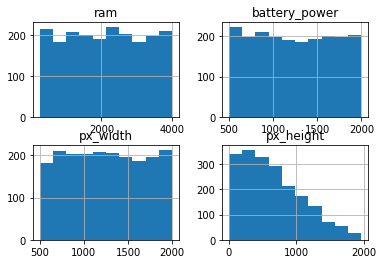

In [13]:
df[['ram', 'battery_power', 'px_width', 'px_height']].hist()

Como podemos ver, las variables `ram`, `battery_power` y `px_width` están distribuidas de manera uniforme. Sin embargo, la variable `px_height` está claramente sesgada hacia la izquierda. En concreto, la gran mayoría de los datos se concentran aproximadamente en el primer tercio de los valores ordenados crecientemente. Esto nos indica que en las otras 3 variables la cantidad de móviles por cada valor que pueden tomar los datos es muy uniforme, mientras que la altura de los píxeles tiende a ser baja en la mayoría de dispositivos.

Aunque este resultado podría llevar a pensar que una menor altura de píxeles implica un menor rango de precio, esto no tiene por qué ser así. Recordemos que previamente hemos concluido que la variable que más se relacionaba con el precio era la RAM con mucha diferencia, y aunque la altura de píxeles era la cuarta variable con más correlación con el precio, su correlación no es determinante.

Una conlcusión importante que sacamos del análisis de estos datos es la siguiente: La variable más diferencial hemos visto que era la RAM con mucha diferencia (es clave el hecho de que sea con mucha diferencia). Como acabamos de ver que el valor de la RAM está distribuido muy uniformemente y que es la que más influencia tiene sobre el rango del precio de los móviles, podemos concluir que el rango de precios de los móviles también va a estar distribuido muy uniformemente. Esto se debe a esta fuerte correlación de la cantidad de RAM y la diferencia que tiene con el resto de variables.

La demostración de esto se puede ver en el primer apartado de este segundo ejercicio, en el que hemos estudiado el equilibrio entre la clase a predecir. Además, también se puede comprobar mediante el histograma del rango de precios, que es la clase a predecir:

array([[<AxesSubplot:title={'center':'price_range'}>]], dtype=object)

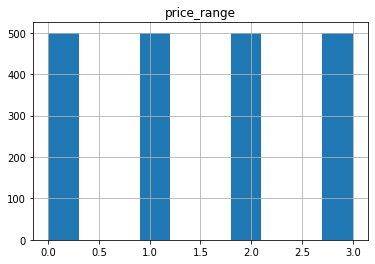

In [14]:
df[['price_range']].hist()

Y efectivamente, el rango de precios está perfectamente distribuido entre los distintos valores que podía tomar.

Vamos a ver ahora el diagrama de dispersión para cada par de variables:

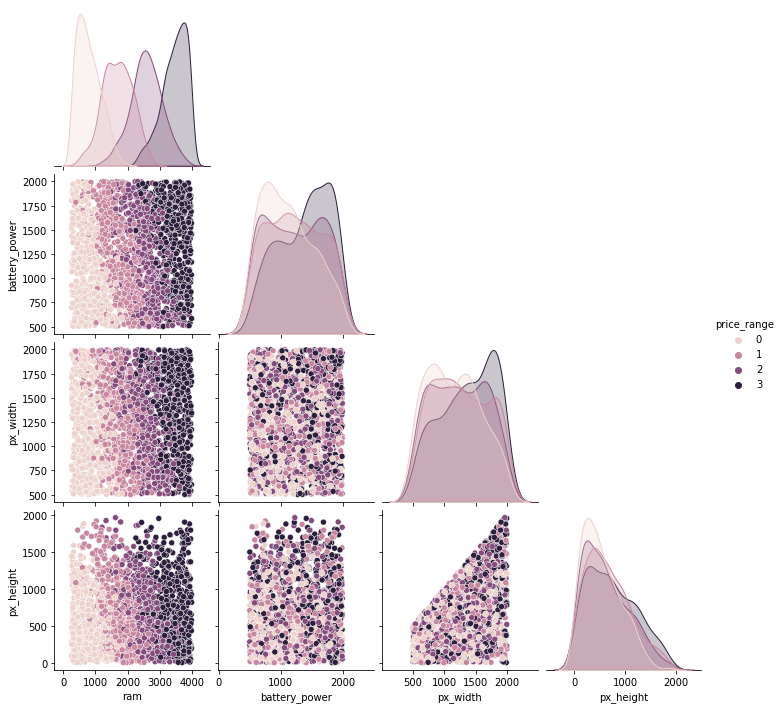

In [15]:
import seaborn as sns
df_new = df[['ram', 'battery_power', 'px_width', 'px_height', 'price_range']]
df_new.groupby(['price_range'])
sns.pairplot(data = df_new, hue = 'price_range', corner = True)

Como ya habíamos concluido previamente, la RAM es la característica más diferencial en relación al precio de los móviles. Como podemos ver en el diagrama de dispersión, es la variable que, combinada con otra cualquiera, mejor separa y diferencia los rangos de precio de los móviles.

Además observamos una relación bastante llamativa entre las variables `px_height` y `px_width`. Hay una relación directamente proporcional en la anchura y altura de los píxeles, que se debe a la relación de aspecto de la pantalla de los dispositivos móviles. Si el alto de la pantalla aumenta, el ancho aumenta también proporcionalmente para mantener la relación de aspecto, y es por eso que vemos esa recta ascendente tan marcada.

**Conclusión:** Una vez hechos los análisis sobre la correlación de los datos, creemos que sería un problema complejo de resolver de no ser por la RAM. En muchos de los análisis hemos concluído que la cantidad de RAM es un factor muy fuertemente relacionado con el precio de los móviles. Por ello, basándonos en los datos que tenemos hasta el momento, podemos afirmar que un clasificador que se guíe principalmente por la cantidad de RAM que tiene un dispositivo conseguirá muy buenos resultados. Esto no implica que puedan llegar datos nuevos (nuevos móviles) que tengan poca RAM y un precio muy elevado, o mucha RAM y un precio muy bajo. Estas conclusiones son basadas exclusivamente en los datos que conocemos.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

#### Solución:

No es necesario normalizar o estandarizar los valores del dataset porque en el proceso de construcción de un árbol de decisión no se relacionan entre sí las variables.

Para construir un árbol de decisión solamente necesitamos calcular las entropías. Para el cálculo de las entropías solo se requiere de la probabilidad de que un individuo pertenezca a una clase o a otra en función de una variable, lo cual es independiente de otras variables.

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

#### Solución:

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate
RANDOM_STATE=83

Vamos a probar a hacer una primera estimación del valor óptimo de `min_samples_split`. Para ello, vamos a probar con valores de 2 a 50 incrementando de 5 en 5:

In [17]:
train_accuracy = []
test_accuracy = []

min_samples = range(2,50,5)

for i in min_samples:
        clf = DecisionTreeClassifier(criterion="entropy",
                                     max_depth=None,       # profundidad máxima del árbol
                                     min_samples_split=i,  # mínimo de muestras en el nodo para seguir dividiéndolo
                                     random_state=RANDOM_STATE)

        # Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
        scores = cross_validate(clf, df_num, df['price_range'], scoring='accuracy', cv=10, return_train_score=True)

        train_accuracy.append(np.mean(scores['train_score']))
        test_accuracy.append(np.mean(scores['test_score']))

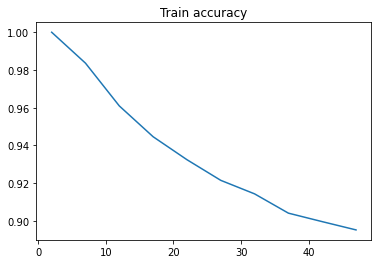

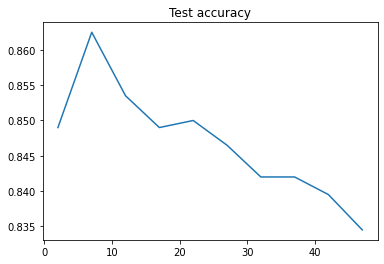

In [18]:
plt.plot(min_samples, train_accuracy)
plt.title('Train accuracy')
plt.show()

plt.plot(min_samples, test_accuracy)
plt.title('Test accuracy')
plt.show()

Ahora que tenemos una primera idea, vemos que el valor máximo de precisión en la parte de test se da en un valor próximo al 10, así que vamos a repetir el proceso pero modificando el parámetro de aprendizaje del árbol. Esta vez irá de 2 a 20, incrementando de 1 en 1.

In [19]:
train_accuracy = []
test_accuracy = []

min_samples = range(2,20)

for i in min_samples:
        clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                                     max_depth=None,       # profundidad máxima del árbol
                                     min_samples_split=i,  # mínimo de muestras en el nodo para seguir dividiéndolo
                                     random_state=RANDOM_STATE)

        # Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
        scores = cross_validate(clf, df_num, df['price_range'], scoring='accuracy', cv=10, return_train_score=True)

        train_accuracy.append(np.mean(scores['train_score']))
        test_accuracy.append(np.mean(scores['test_score']))

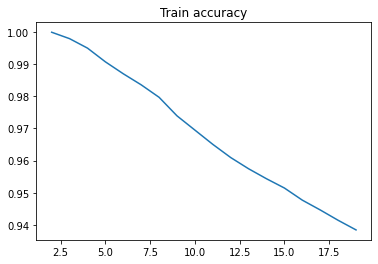

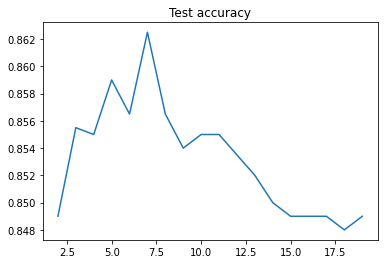

In [20]:
plt.plot(min_samples, train_accuracy)
plt.title('Train accuracy')
plt.show()

plt.plot(min_samples, test_accuracy)
plt.title('Test accuracy')
plt.show()

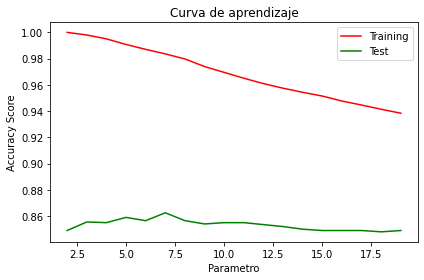

In [21]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(min_samples, train_accuracy, color="r",  label="Training")
plt.plot(min_samples, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Como podemos apreciar en los resultados, el valor óptimo de `min_samples_split` se da cuando este vale 7, así que vamos a ver el valor exacto de la precisión del test para este valor.

In [22]:
clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                             max_depth=None,       # profundidad máxima del árbol
                             min_samples_split=7,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, df_num, df['price_range'], scoring='accuracy', cv=10, return_train_score=True)

np.mean(scores['train_score']) , np.mean(scores['test_score'])

(0.983611111111111, 0.8625)

Analizando los resultados vemos que la precisión del clasificador para el valor óptimo del parámetro `min_samples_split` (= 7) vemos que es del 86.25%.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None,min_samples_split=7, random_state=RANDOM_STATE)
clf = clf.fit(df_num, df['price_range'])

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, df_num, df['price_range'], scoring='accuracy', cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
print(train_accuracy, ", ", test_accuracy)

0.983611111111111 ,  0.8625


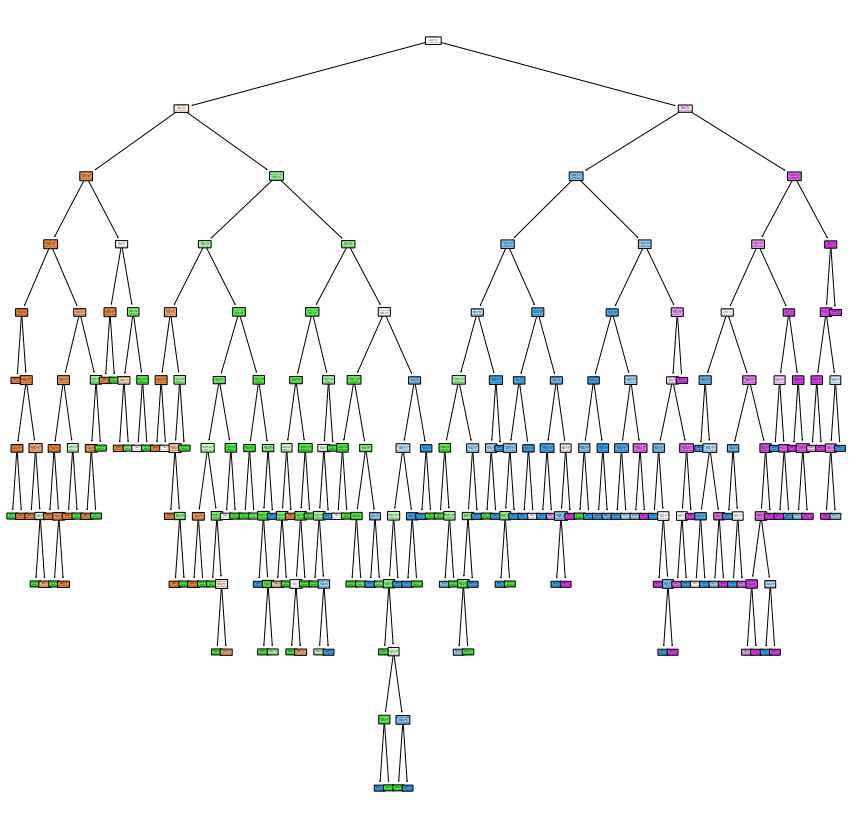

In [24]:
# Pintamos el árbol completo
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=df.keys(), class_names=df.keys().astype('str'), rounded=True)
plt.show()

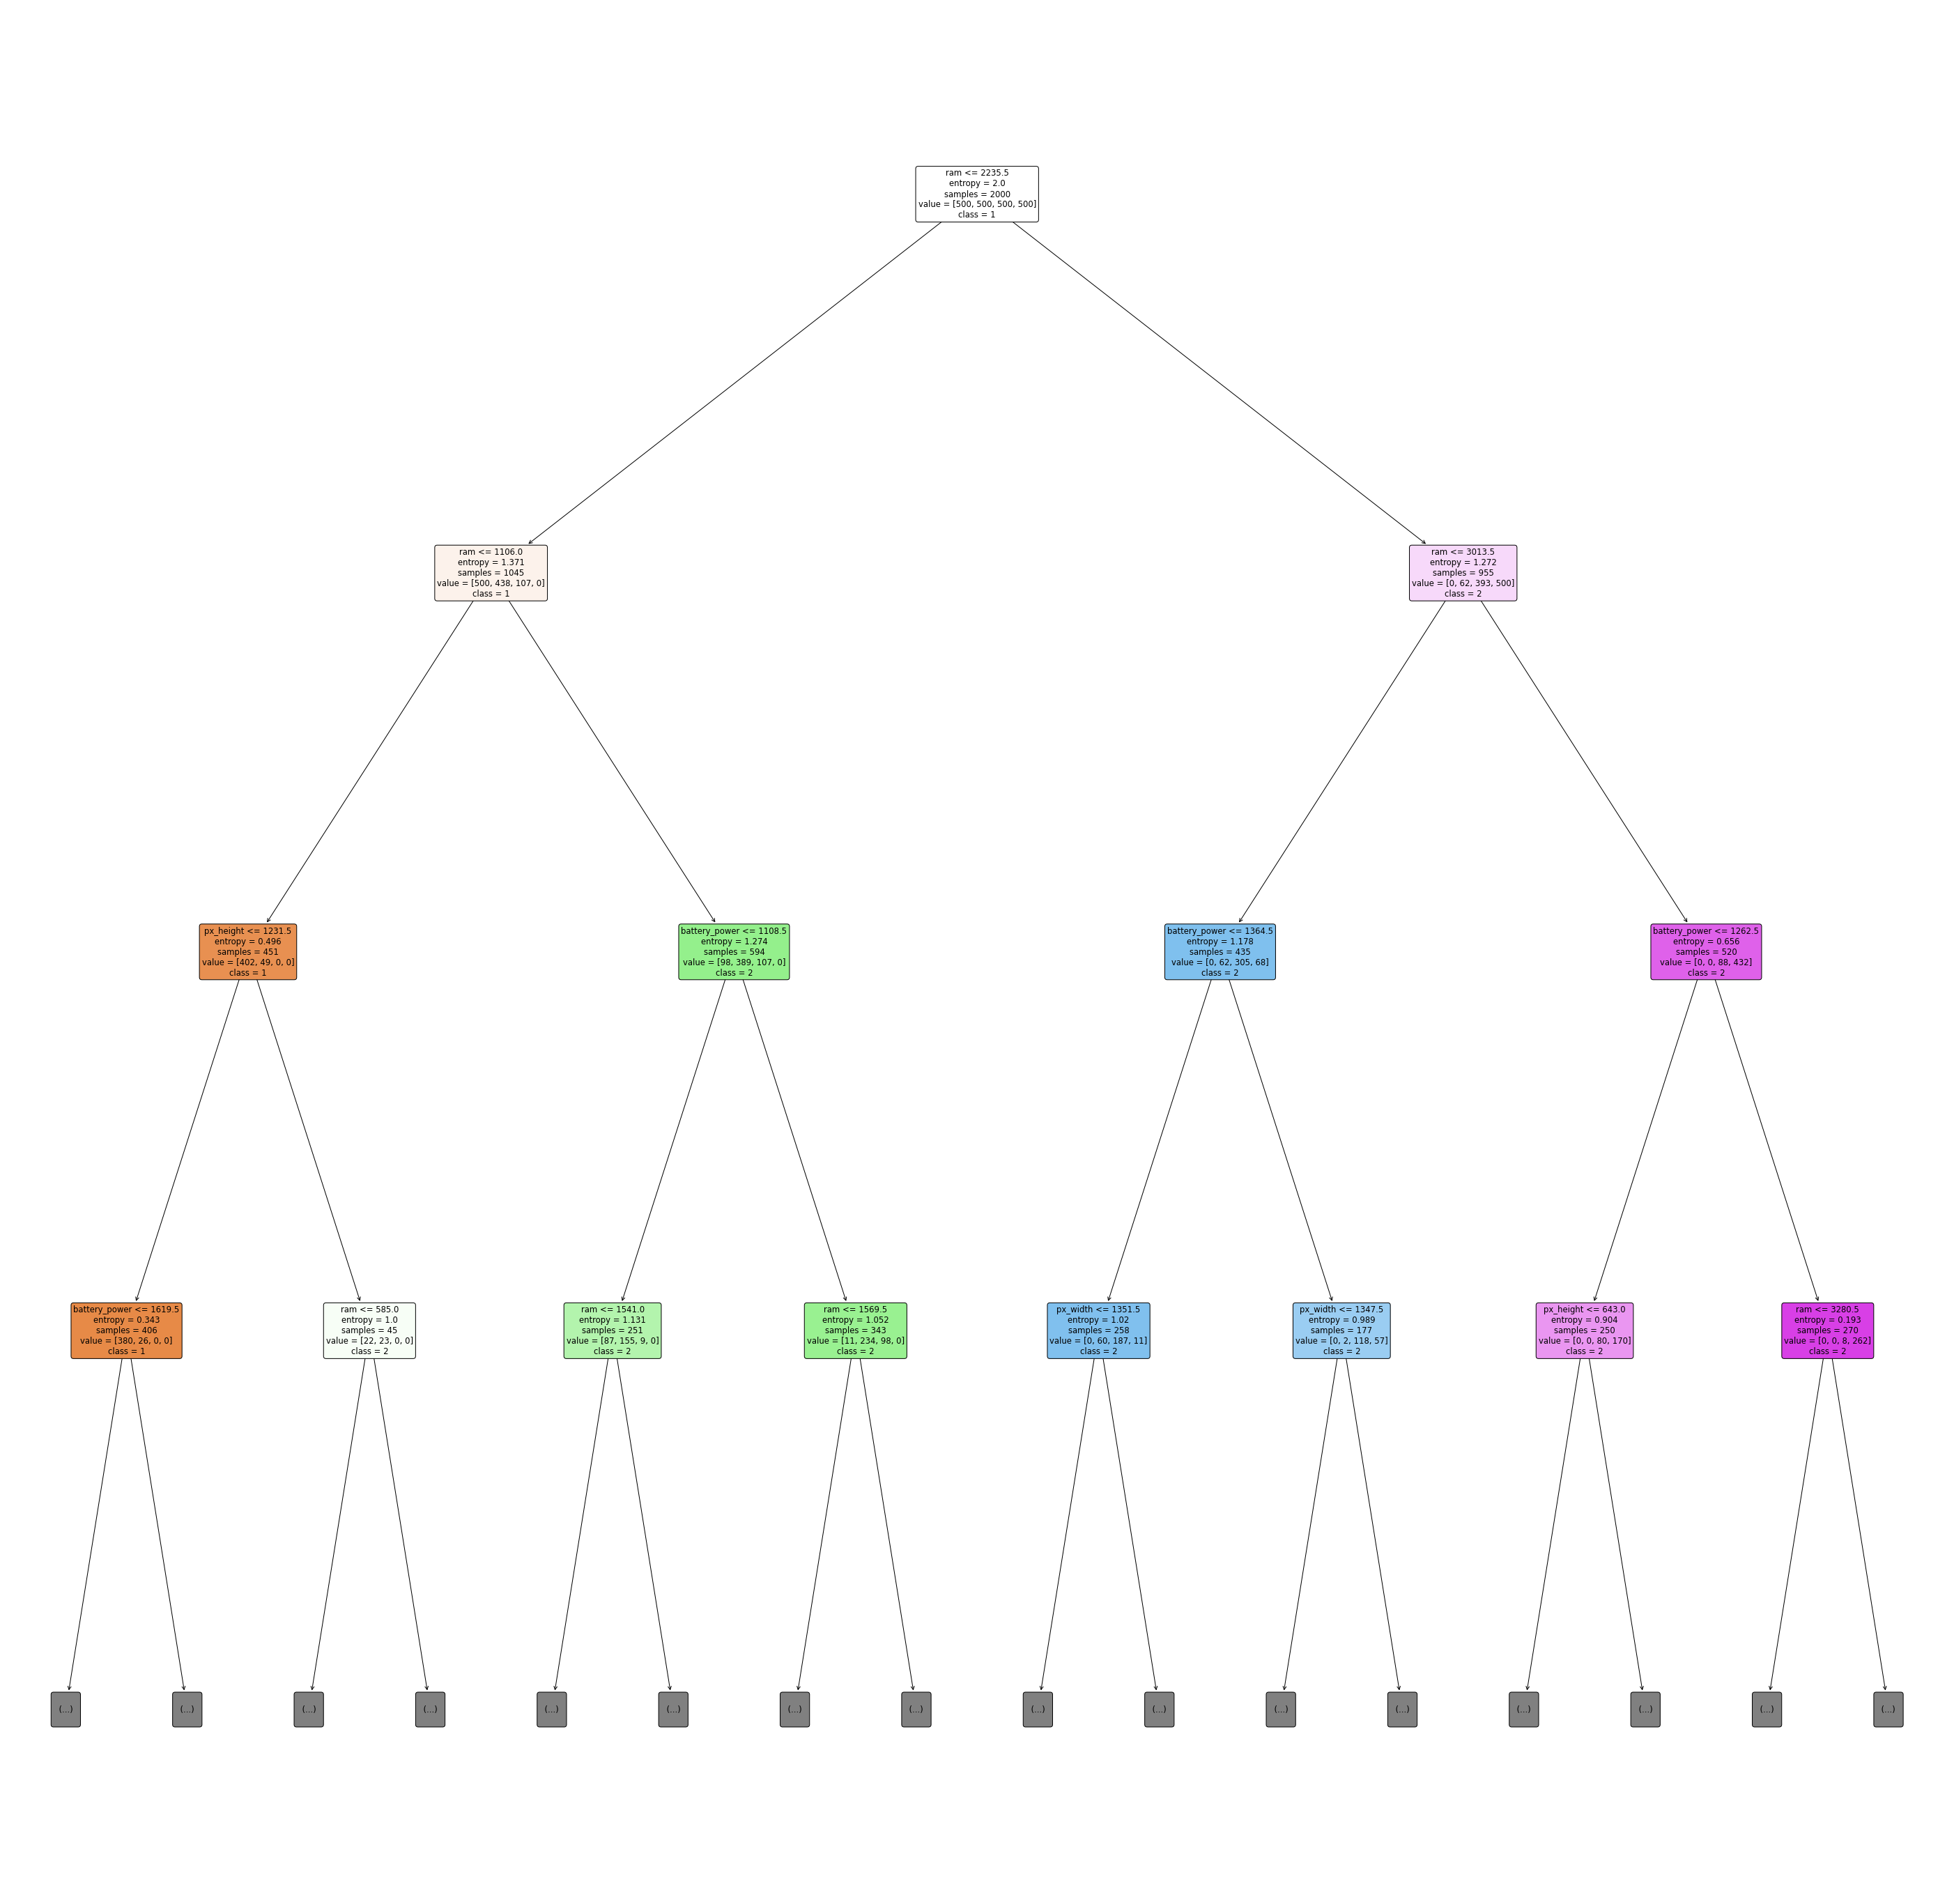

In [26]:
# Pintamos los tres primeros niveles del árbol
plt.figure(figsize=(50,50))
plot_tree(clf, filled=True, feature_names=df.keys(), class_names=df['price_range'].astype('str'), rounded=True, max_depth=3)
plt.show()

Debido a lo grande que es el árbol, es complicado ver los valores sobre la imagen generada. Sin embargo, se puede abrir la imagen en una pestaña nueva del navegador y como le hemos dado bastante resolución sí que se pueden ver los resultados si hacemos zoom.

Lo primero que vemos y que más llama la atención es que la cantidad de RAM se usa para diferenciar los dos primeros niveles del árbol, lo cual divide a los dispositivos en 4 grupos distintos, bastante orientado a lo que será su precio final. Esto se debe a que, como ya hemos visto antes, la cantidad de RAM es diferencial para hacer la división en distintos grupos de precios. Es por esto que la primera estimación de precio en el árbol se hace mediante la cantidad de RAM.

También es destacable que la primera bajada del árbol (desde la raíz hasta los primeros 2 hijos) produce un decremento bastante numeroso en cuanto al valor de la entropía. Esto indica que una primera división en 2 grupos de cantidad de RAM es la mejor predicción inicial del rango de precio del dispositivo.

Vemos que a partir de este segundo nivel de divisiones hechas por la cantidad de RAM, empieza a cobrar importancia la potencia de la batería en 3 de los 4 grupos resultantes para ser clasificados. De hecho, estos 3 grupos son los que más RAM tenía. En el grupo que sobra de estos 4, que es además el que menos cantidad de RAM tiene, toma importancia la altura de los píxeles para ser clasificado.

A partir de este nivel la entropía empieza a ser más baja. Sin embargo, las variables que se siguen tomando como diferenciales para dividir en nuevos grupos siguen siendo las mismas, que son la cantidad de RAM, la potencia de la batería, y la altura de los píxeles, con la novedad de la anchura de los píxeles.

Llama la atención que estemos en el cuarto nivel de decisión del árbol y aún se sigan utilizando las mismas cuatro variables. Por ello, vamos a estudiar la importancia de cada variable sobre un total de 1 (también podría verse como un porcentaje sobre el 100%):

In [27]:
sorted(dict(zip(df.keys(),clf.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('ram', 0.6906098463478361),
 ('battery_power', 0.11671513853255507),
 ('px_width', 0.07726712619594986),
 ('px_height', 0.0645443710201956),
 ('mobile_wt', 0.014627455281612167),
 ('int_memory', 0.006839383479714214),
 ('m_dep', 0.006663172739964732),
 ('pc', 0.006236883320029371),
 ('n_cores', 0.004533503866416765),
 ('talk_time', 0.0038447606500316336),
 ('clock_speed', 0.002753167822534279),
 ('sc_w', 0.001971438745462446),
 ('wifi', 0.0011438969794146149),
 ('dual_sim', 0.0011249275091416396),
 ('sc_h', 0.0011249275091416396),
 ('blue', 0.0),
 ('fc', 0.0),
 ('four_g', 0.0),
 ('three_g', 0.0),
 ('touch_screen', 0.0)]

Estos resultados demuestran el por qué incluso estando en el nivel 4 del árbol seguimos usando las mismas 4 variables. Es porque las 4 variables de más importancia suman un total del 94.7% de la importancia final a la hora de decidir el rango de precio de un móvil. Esto supone que el resto de las variables se van a utilizar en niveles próximos a las hojas del árbol para predecir el rango de precio llegados a características muy específicas y con menos relevancia.

Incluso, como podemos ver, hay variables que ni siquiera se tienen en cuenta, como son si tiene bluetooth o no, los megapíxeles de la camara frontal, si tiene 4G o no, si tiene 3G o no y si tiene pantalla táctil o no. Si hacemos un análisis real de por qué estas variables no se tienen en cuenta en la clasificación nos damos cuenta de que es porque se trata de características que se asume que todos los dispositivos móviles de hoy en día cuentan con ellas. En el caso de los megapíxeles de la cámara frontal, puede ser o porque todos los dispositivos tienen la misma calidad o porque hay pequeñas variaciones de calidad y estas variaciones no son nada relevantes en el precio final.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [210]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
clf = DecisionTreeClassifier(criterion="entropy", 
                     max_depth=None,          # profundidad máxima del árbol
                     min_samples_split=7,  # mínimo de muestras en el nodo para seguir dividiéndolo
                     random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, df_num, df['price_range'], scoring=scoring_metrics, cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8639881074002386
Exhaustividad ponderada media:  0.8625
F1 ponderado media:  0.8624541896301812


In [211]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=7, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, df_num, df['price_range'], cv=10)

# Informe por clases
cr = classification_report(df['price_range'],predictions, target_names=['0','1','2','3'])
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       500
           1       0.83      0.83      0.83       500
           2       0.81      0.81      0.81       500
           3       0.89      0.89      0.89       500

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [212]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



Confusion matrix, without normalization
[[459  41   0   0]
 [ 45 417  38   0]
 [  0  42 405  53]
 [  0   0  56 444]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

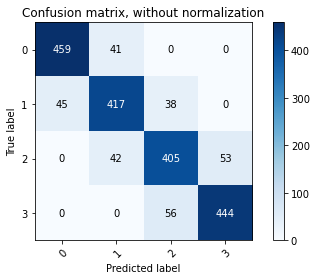

In [213]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(df['price_range'], predictions, ['0','1','2','3'], normalize=False)

## 7) **OPCIONAL**: Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.
